# Data analysis and visualizations of the "Titanic: Machine Learning from Disaster" challenge 

This notebook focuses on analysing the Titanic data set for correctly predicting the survival rate of the passengers of the titanic using the Kaggel's Titanic challenge dataset.

In this notebook, we'll take a look at how the data is organized, what features represent the training data and which ones would be the most useful for a classification model to predict if a person would be likely to survive the trip or not.

The notebook is structured as follows:

1. **Loading data**

  1.1. Import libraries
  
  1.2. Load files
  
2. **Data analysis and visualization**

  2.1. Check data format
  
  2.2. Checking for missing values
  
  2.3. Detecting outliers
  
  2.4. Removing outliers
  
  2.5. Analyze numerical fields
  
    - Age
    - Fare
    - SibSp
    - Parch
    - Pclass
  
  2.6. Analyze categorical fields
  
    - Name
    - Sex
    - Pclass
    - Embarked
    - Ticket
    - Cabin

3. **Fill missing values and feature engineering**

  3.1. Age
  
  3.2. Cabin
  
  3.3. Embarked
  
  3.4. Fare
  
  3.5. Ticket
  
  3.6. New field: Name/Title
  
  3.7. New field: Family size

4. **Export data**

  4.1. Convert fields to categorical values
  
  4.2. Split data to train and test sets
  
  4.2. Save transformed data to .csv files

## 1. Loading data

### 1.1. Import necessary libraries

In [1]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
sns.set_style('whitegrid')

### 1.2. Load files

In [3]:
# Load the Titanic dataset's data files
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")

## 2. Data analysis and visualization

### 2.1. Check data format

See how the data is formatted (data types, fields)

In [4]:
# check out a sample of the DataFrame
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# check out how the test DataFrame is organized
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
# check the data types, number of entries and missing values present in the DataFrame 
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
# Check the test data format
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
# Get some statistics of the training data
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# Same for the test DataFrame
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


#### About the data

The training data of the dataset is formated as the following table:


| Variable | Definition | Key |
|---|---|---|
| PassengerId | Passenger Id | |
| Survival | Survival | 0 = No, 1 = Yes |
| Pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd |
| Sex | Sex	| |
| Age | Age in years |
| Sibsp	| # of siblings / spouses aboard the Titanic | |
| Parch	| # of parents / children aboard the Titanic | |
| Ticket | Ticket number | | 
| Fare | Passenger fare	| |
| Cabin | Cabin number | |
| Embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |

This dataset is rather small: the training data is composed of around 900 entry points. 

From these fields, only 3 have missing values (Age, Cabin and Embarked). This means that it is required to address the missing data before proceeding to fit a model with it.

About half of the fields are in numeric format and the other half are categorical data (strings). Converting the categorical data is required before proceeding to fit a model with this data.

To understand which fields are useful and which are not, additional analysis are required to better understand the data. Next, we proceed with some data visualizations/plotting to aid us in gathering more insights about this dataset.  

In [10]:
# Before proceeding any further, lets concat the train and test sets for future data analysis / processing
df = pd.concat([train_df, test_df], keys=["train", "test"])

### 2.2 Checking for missing values

First lets see if there exists missing values in the dataset that need to be removed/filled

In [11]:
# Show the data format and number of non-null entries available for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1309 entries, (train, 0) to (test, 417)
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 133.6+ KB


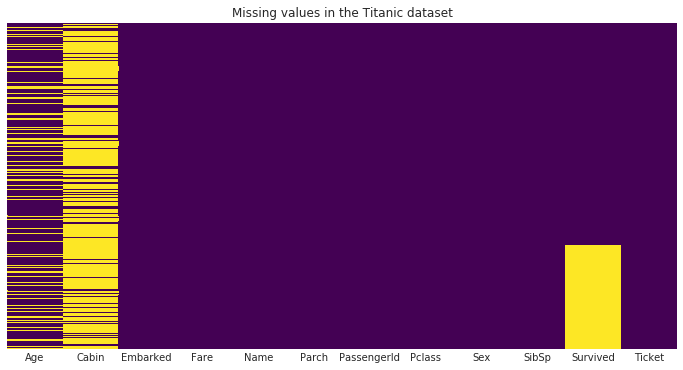

In [12]:
# Visually check the missing values in the dataset
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis', ax=ax)
ax.set_ylabel('')
ax.set_title('Missing values in the Titanic dataset')

We can see that there are columns with missing values in the dataset. These include the **Age**, **Cabin**, **Embarked** and **Fare** fields. The **Survived** field is only used as the label for training a model, so the other remaining missing values are attributed to the test set and don't need to be filled.

Before filling these missing values, its is necessary to check out for outliers for these fields as well. That will be done in the next subsection.

In [13]:
# Preemptively fill all missing values as NaNs
df = df.fillna(np.nan)

In [14]:
# Sum all the empty values in the dataset
df.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

### 2.3 Detecting outliers

This subsection deals with finding outliers for numerical fields. Outlier values are usually extreme events or special cases that are somewhat harmfull for the generalization of learned models are are best to be removed in order for a model to perform better.

Here, we'll use the Tukeys method (IQR - Inter-Quartile Range) to detect and remove numerical values that can be considered as outliers. The outlier removal process is simple: we'll search for events (values) that are in of of the extremes of the distribution and flag them as outliers for the **Age**, **Fare**, **Parch** and **SibSp** fields. If an index has been flagged as an outlier for more than two of these fields, it is considered as an outlier and will be discarded.

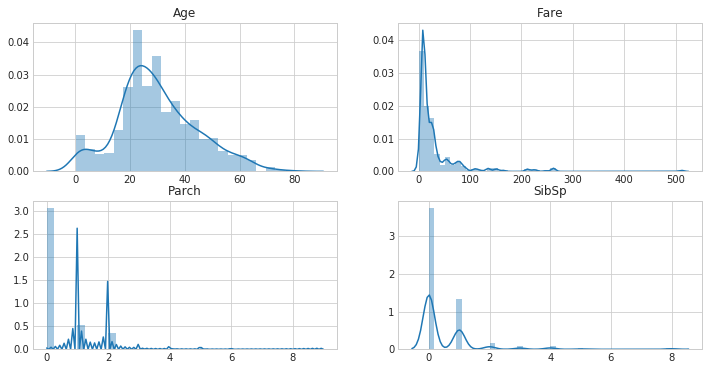

In [15]:
# Histograms for the Age, Fare, Parch and SibSp fields
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(12,6))
sns.distplot(df["Age"].dropna(), ax=ax1)
ax1.set_title('Age')
ax1.set_xlabel('')
sns.distplot(df["Fare"].dropna(), ax=ax2)
ax2.set_title('Fare')
ax2.set_xlabel('')
sns.distplot(df["Parch"].dropna(), ax=ax3)
ax3.set_title('Parch')
ax3.set_xlabel('')
sns.distplot(df["SibSp"].dropna(), ax=ax4)
ax4.set_title('SibSp')
ax4.set_xlabel('')

We can see all distributions have their set of outliers that should be dealth with. We'll follow the recipe explained previously to select the rows of data that produce extreme events.

Also, compressing skewed distributions using the log transform will help in training a model to produce a better estimate based on these values. This will be addressed later on when egineering the features that will be used to train a model.

In [16]:
from collections import Counter

def detect_ouliers(dataframe, fields, n):
    """
    Detects ouliers for a set of fields of a DataFrame 
    and returns a list of indices of outlier rows.
    
    If it exists more than 'n' duplicate indices, these
    indices are flagged as outliers and added to a list.
    """
    outliers = []
    for field in fields:
        # compute the first and third quartile values
        Q1 = dataframe[field].quantile(0.25)
        Q3 = dataframe[field].quantile(0.75)
        
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # use an offset over the quantile to classify a value being an outlier
        offset = 1.5 * IQR
        
        # detect indexes as outliers
        field_outliers = dataframe[(dataframe[field] < Q1 - offset) | (dataframe[field] > Q3 + offset)]
        
        # Get a list of indices
        indices = field_outliers.index.tolist()
        
        outliers.extend(indices)
    
    # Count number of duplicate indices
    outlier_indices = Counter(outliers)
    
    # Filter only the duplicate indices and discard the rest
    output_outliers = list( k for k, v in outlier_indices.items() if v >= n )
    
    return output_outliers
    
outliers = detect_ouliers(df.loc['train'], ["Age","SibSp","Parch","Fare"], n=3)

In [17]:
# Show all outlier entries
df.iloc[outliers]

Age        Cabin Embarked    Fare  \
train 745  70.0          B22        S   71.00   
      27   19.0  C23 C25 C27        S  263.00   
      88   23.0  C23 C25 C27        S  263.00   
      159   NaN          NaN        S   69.55   
      180   NaN          NaN        S   69.55   
      201   NaN          NaN        S   69.55   
      324   NaN          NaN        S   69.55   
      341  24.0  C23 C25 C27        S  263.00   
      792   NaN          NaN        S   69.55   
      846   NaN          NaN        S   69.55   
      863   NaN          NaN        S   69.55   

                                        Name  Parch  PassengerId  Pclass  \
train 745       Crosby, Capt. Edward Gifford      1          746       1   
      27      Fortune, Mr. Charles Alexander      2           28       1   
      88          Fortune, Miss. Mabel Helen      2           89       1   
      159         Sage, Master. Thomas Henry      2          160       3   
      180       Sage, Miss. Constance Gladys      2          181       3   
      201                Sage, Mr. Frederick      2          202       3   
      324           Sage, Mr. George John Jr      2          325       3   
      341     Fortune, Miss. Alice Elizabeth      2          342       1   
      792            Sage, Miss. Stella Anna      2          793       3   
      846           Sage, Mr. Douglas Bullen      2          847       3   
      863  Sage, Miss. Dorothy Edith "Dolly"      2          864       3   

              Sex  SibSp  Survived     Ticket  
train 745    male      1       0.0  WE/P 5735  
      27     male      3       0.0      19950  
      88   female      3       1.0      19950  
      159    male      8       0.0   CA. 2343  
      180  female      8       0.0   CA. 2343  
      201    male      8       0.0   CA. 2343  
      324    male      8       0.0   CA. 2343  
      341  female      3       1.0      19950  
      792  female      8       0.0   CA. 2343  
      846    male      8       0.0   CA. 2343  
      863  female      8       0.0   CA. 2343

11 rows have been detected as outliers. Some of them like rows 27, 88 and 341 have high fares while the other have a large number of siblings in their family. Curiously, all of them embarked from the Southampton (S) port.

### 2.4 Removing outliers

Now that we've detected possible outliers in the data, lets proceeed in discarding these rows such that a model trained on this data is able to generalize better and give better predictions.

In [18]:
# Select a slice view of the train set
new_train = df.loc['train'].drop(outliers, axis=0)

In [19]:
filtered_df = pd.concat([new_train, df.loc['test']], keys=['train', 'test'])

In [20]:
# old dataframe
len(df)

1309

In [21]:
# new dataframe
len(filtered_df)

1298

### 2.5 Analyze numerical fields

This section deals with analysing the numerical fields of the data set and gather information about them.

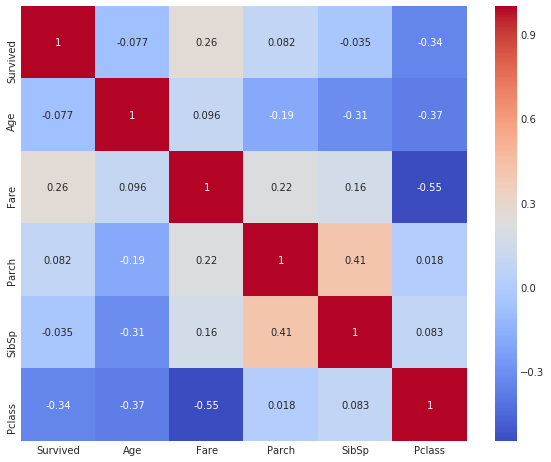

In [22]:
# Plot an heatmap of all numerical fields in the dataset
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
sns.heatmap(train_df[['Survived', 'Age', 'Fare', 'Parch', 'SibSp', 'Pclass']].corr(), annot=True, cmap='coolwarm', ax=ax)

From the correlation's heatmap, we can see that **Fare**, **Age** and **Pclass** are somewhat correlated with the survival rate of a passenger. We cannot tell if the other fields have any indirect impact to the overall survival rate of a passenger with this information, but these fields can have some correlation with subgroups of the population.

### Age

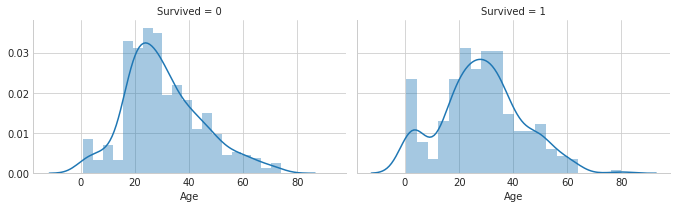

In [23]:
# Plot the age distribution for the surviving and non-surviving passengers
g = sns.FacetGrid(data=train_df, col="Survived", aspect=1.6)
g.map(sns.distplot, 'Age', bins=20)

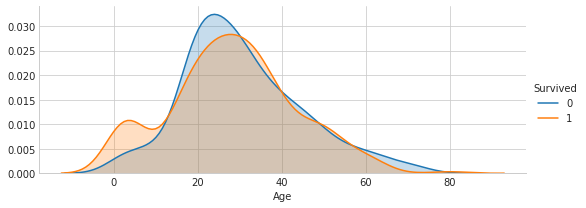

In [24]:
# Super-impose the two distributions to better compare them (i.e., to see the key differences between the two)
g = sns.FacetGrid(data=train_df, hue='Survived', aspect=2.5)
g.map(sns.kdeplot, 'Age', shade=True)
g.add_legend()

The **Age** distribution clearly shows a trend for higher survivability of younger passengers when compared with the rest of the ages.

### Fare

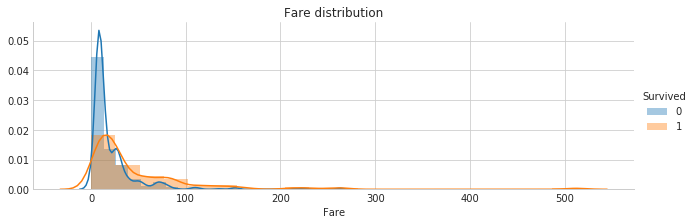

In [25]:
# Plot the fare distribution of all passengers
g = sns.FacetGrid(data=train_df, hue="Survived", aspect=3)
g.map(sns.distplot, 'Fare', bins=20)
g.ax.set_title('Fare distribution')
g.add_legend()

The **Fare** attribute has a skewed distribution with a long tail and this will negatively influence the hability of an algorithm to efficiently use this data for prediction. 

To correct for this, it would be best to compact the values using a log transformation.

### SibSp

In [26]:
# Lets see how many passengers are distributed by number of spouses/sublings
train_df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

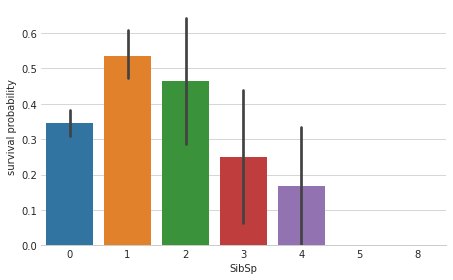

In [27]:
# Plot the survival rate of each group of SibSp
g = sns.factorplot(data=train_df, x='SibSp', y='Survived', kind='bar', aspect=1.6)
g.despine(left=True)
g = g.set_ylabels("survival probability")

Passengers with some spouses/siblings survival rate vary quite alot compared with passengers with few spouses/siblings.

This feature indicates that the family size of a passengers would be a good indicator to use to predict the survival rate.

### Parch

In [28]:
# Lets see how many passengers are distributed by number of parents/children
train_df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

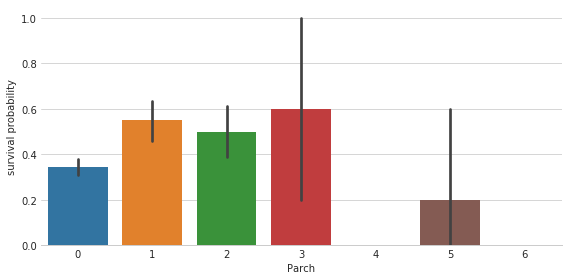

In [29]:
# Plot the survival rate of each group of Parch
g = sns.factorplot(data=train_df, x='Parch', y='Survived', kind='bar', aspect=2)
g.despine(left=True)
g = g.set_ylabels("survival probability")

Like the **SibSp** field, the **Parch** also indicates that larger families survival rate varies alot, and that smaller families have a better chance to survive than larger families.

### Pclass

In [30]:
# Lets see how many passengers are distributed by class
train_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

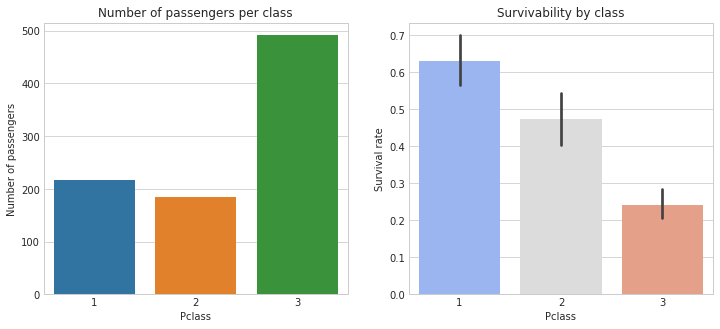

In [31]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

# Plot the number of passengers by class
g = sns.countplot(data=train_df, x='Pclass', ax=ax1)
g.set_ylabel('Number of passengers')
g.set_title('Number of passengers per class')

# Plot the survival rate by passenger class
g = sns.barplot(data=train_df, x='Pclass', y='Survived', ax=ax2, palette='coolwarm')
g.set_ylabel('Survival rate')
g.set_title('Survivability by class')

The **Pclass** field is also a strong predictor for the survivability of a passenger on the titanic. It appears that more priviledged persons would much probable to survive than less priviledged ones.

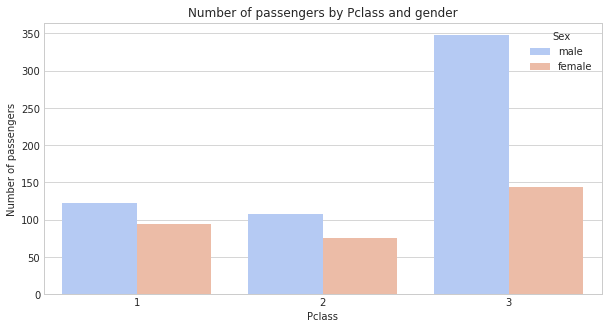

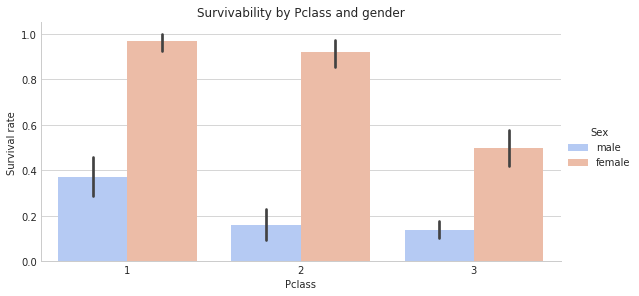

In [32]:
# Plot the number of passengers by class and gender
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
g = sns.countplot(data=train_df, x='Pclass', hue='Sex', palette='coolwarm', ax=ax1)
ax1.set_ylabel('Number of passengers')
ax1.set_title('Number of passengers by Pclass and gender')

# Plot the survival rate of passengers by class and gender
g = sns.factorplot(data=train_df, x='Pclass', y='Survived', hue='Sex', kind='bar', palette='coolwarm', aspect=2)
g.ax.set_ylabel('Survival rate')
g.ax.set_title('Survivability by Pclass and gender')

Again, the gender is the main indicator of the survival rate of a passenger. Even males from higher, more priviledge classes have a lower survival rate than females of lower classes.

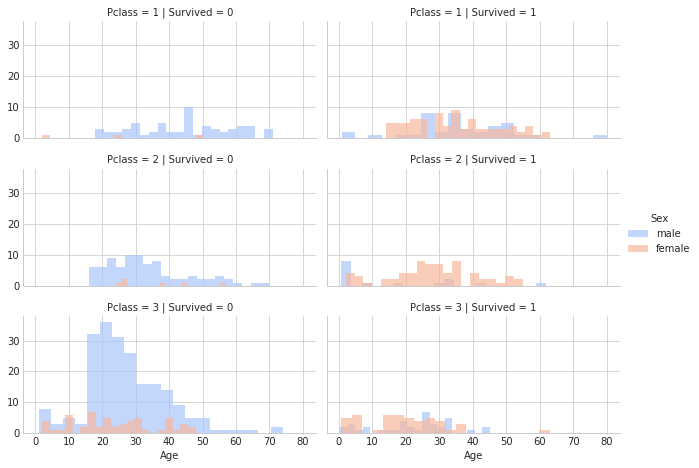

In [33]:
# Next, lets check and see the survival rate of the passenger's sex vs class vs age
g = sns.FacetGrid(data=train_df, col='Survived', row='Pclass', size=2.2, aspect=2, hue='Sex', palette='coolwarm')
g.map(plt.hist, "Age", alpha=0.7, bins=20)
g.add_legend()

This plot provides more finer grain detail of the likelihood of a passenger being able to survive considering his/hers **Age**, **Sex** and **Pclass** attributes. 

For males, younger passengers are more likely survive independently of the class they traveled in.For older passengers, the class has a significant impact on the survival rate.

For females, the class they travel in is not as important as for the male passengers, although the survival rate for passengers of the 3rd class is lower than of the other two classes.

### 2.6 Analyze categorical fields

This subsection deals with analyzing categorical (non-numerical) fields in order to gain a better understanding of the type of data available to use for helping separate the passengers who survived on the voyage. These fields include:     
    
    - Name
    - Sex
    - Pclass
    - Embarked
    - Ticket
    - Cabin

As a reminder, in this subsection, only data analysis will be performed, but in Section 3. we'll be using the insigths gained here to process and clean the data to better help us predict who survived.

### Name

In [34]:
# First, lets take a peek at how the names are composed
train_df['Name'].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In this format, there seems that every entry will be unique of all other. However, every passenger has a title in his/her name that we could take advantage of in grouping them into categories. The rationale is, as seen in the Section 2.5 with the **SibSp** and **Parch** fields, the title will convey information of single or married individuals or other types of titles. 

For that, we need to process/split the data strings in order to fetch this information. In a first look, the names are separated by *last* name, followed by the *title* and the *first* name. This is how we'll retrieve this information.

In [35]:
# Just for the sake of argument, lets check how many unique names there are
print('Number of total names: ', len(train_df['Name']))
print('Number of unique names: ', len(train_df['Name'].unique()))

Number of total names:  891
Number of unique names:  891


As figured, every entry in **Name** is unique.

Lets proceed in fetching the title from the name.

In [36]:
# Split the names by comma, remove dots characters and split the resulting string by whitespace to get the title
titles = train_df['Name'].map(lambda name: name.split(',')[1].split('.')[0])
titles.value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Col               2
 Major             2
 Mlle              2
 Ms                1
 the Countess      1
 Jonkheer          1
 Mme               1
 Sir               1
 Don               1
 Lady              1
 Capt              1
Name: Name, dtype: int64

In [37]:
# Count how many unique titles exist
len(titles.value_counts())

17

17 different result from the **Name** field. Here we can see that the most common titles are **Mr** and **Miss**. Another interesting finding is the different kinds of titles that emerged from processing the strings like infrequent titles such as **Don** or **Capt**. Some of these seem to belong to higher social status that can be used to help separate subgroups in the **Pclass** field where such types of personalities might have the privilege to escape the shipwreck.

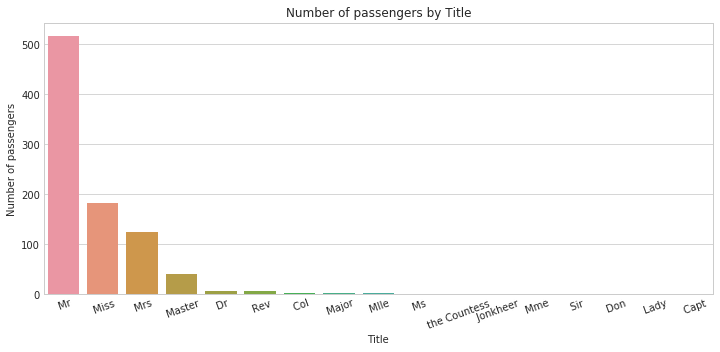

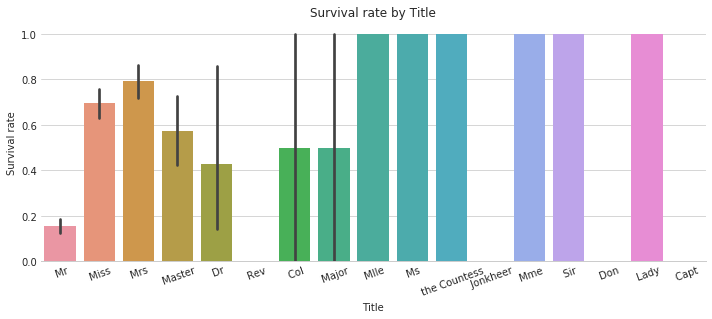

In [38]:
# Plot the passengers count by title
train_df['Title'] = titles
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,5))
g = sns.countplot(data=train_df, x='Title', order=titles.value_counts().index, ax=ax)
ax.set_xticklabels(g.get_xticklabels(), rotation=20)
ax.set_ylabel('Number of passengers')
ax.set_title('Number of passengers by Title')

# Plot the survival rate of the passengers grouped by title
g = sns.factorplot(data=train_df, x='Title', y='Survived', kind='bar', order=titles.value_counts().index, aspect=2.5)
g.despine(left=True)
g.set_xticklabels(rotation=20)
g.set_ylabels('Survival rate')
g.ax.set_title('Survival rate by Title')

As expected, some groups have a much better survival rate than others. However, because there's only a few values for the less common titles, it is not possible to estimate with a confortable degree of curtainty that some titles are better than others (although the captain title is probably the worst since it is common for the captain to be the last one to leave the ship in cases of shipwrecks). 

### Sex

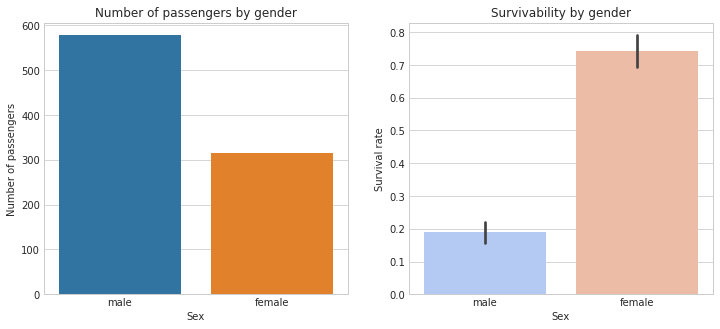

In [39]:
# Plot the number of passengers by gender
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
g = sns.countplot(data=train_df, x='Sex', ax=ax1)
g.set_ylabel('Number of passengers')
g.set_title('Number of passengers by gender')

# Plot the survival rate by gender
g = sns.barplot(data=train_df, x='Sex', y='Survived', ax=ax2, palette='coolwarm')
g.set_ylabel('Survival rate')
g.set_title('Survivability by gender')

In [40]:
# Compute the mean of the survival rate of each gender
train_df[["Sex","Survived"]].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


It is clear that the gender attribute influences the sruvival rate of a passenger on the titanic. The **Sex** field is a key attribute for training and evaluating on any statistical algorithm.

### Embarked

In [41]:
# Count the number of unique ports which passengers have embarked from
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

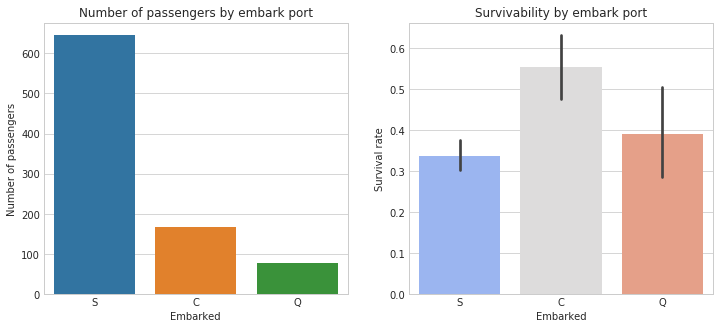

In [42]:
# Plot the number of passngers by embark port
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
g = sns.countplot(data=train_df, x='Embarked', ax=ax1)
g.set_ylabel('Number of passengers')
g.set_title('Number of passengers by embark port')

# Plot the survival rate of passengers by embark port
g = sns.barplot(data=train_df, x='Embarked', y='Survived', ax=ax2, palette='coolwarm')
g.set_ylabel('Survival rate')
g.set_title('Survivability by embark port')

Knowing where a passenger embarked would give a passenger a higher chance to survive. This might be due to other factors like the passenger's class where passengers from the Queenstown (Q) port being of an upper class than those from the Southampton (S) embark port. 

Lets see if this hypothesis is valid by comparing the **Embarked** and **Pclass** fields.

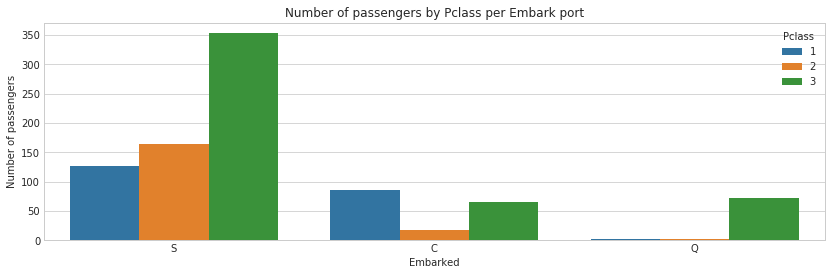

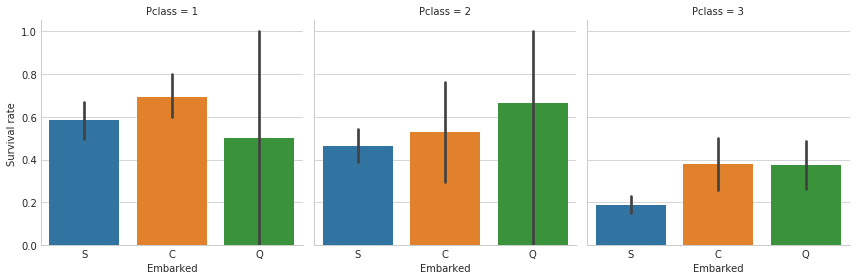

In [43]:
# Plot the number of passengers by class and embark port
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(14,4))
g = sns.countplot(data=train_df, x='Embarked', hue='Pclass', ax=ax1)
g.set_ylabel('Number of passengers')
g.set_title('Number of passengers by Pclass per Embark port')

# Plot the survival rate of passengers by class and embark port
g = sns.factorplot(data=train_df, x='Embarked', y='Survived', col='Pclass', kind='bar')
g.set_ylabels('Survival rate')

Here we see that the bulk of the passengers came from the Southampton (S) port. Fewer passengers came from the other ports, and indeed the survival rate does vary from port to port but it is not enough to predict a passenger's survival rate based on the passenger class and embark port.

### Ticket

In [44]:
# Count the number of unique ticket groups
train_df['Ticket'].value_counts()

1601               7
CA. 2343           7
347082             7
347088             6
CA 2144            6
3101295            6
382652             5
S.O.C. 14879       5
113781             4
349909             4
113760             4
2666               4
LINE               4
4133               4
17421              4
19950              4
W./C. 6608         4
PC 17757           4
347077             4
347742             3
PC 17760           3
110413             3
371110             3
363291             3
345773             3
PC 17572           3
230080             3
PC 17582           3
F.C.C. 13529       3
C.A. 31921         3
                  ..
323592             1
26707              1
13214              1
28206              1
349253             1
A/5. 10482         1
SOTON/OQ 392076    1
S.O.P. 1166        1
SOTON/OQ 392090    1
323951             1
PC 17599           1
2641               1
233639             1
27267              1
239854             1
349205             1
695          

In [45]:
# Too many tickets to visualize, so lets count the number of all unique tickets
len(train_df['Ticket'].unique())

681

There are many different types of tickets in the **Tickets** field (681 unique tickets to be precise). However, there appears to be some types of tickets that start with the same string like "PC 17610" and "PC 17318" or "CA. 2343" and "CA 2144". Lets split the tickets for prefixes and count how many groups exist in the data.

In [46]:
# Lets retrieve thethe ticket prefix of each ticket
ticket_by_prefix = train_df['Ticket'].map(lambda ticket: ticket.replace('.', '').replace('/', '').strip().split(' ')[0])
len(np.unique(ticket_by_prefix))

544

Grouping the tickets by prefix helped to group the tickets into smaller groups. Maybe grouping them by strings vs digits may cluster the data into more meaningful groups.

In [47]:
# Group the tickets withouth prefix into a single group
ticket_groups = ticket_by_prefix.map(lambda ticket: ticket if not ticket.isdigit() else 'Digits')
len(np.unique(ticket_groups))

31

This helped reduce the total number of groups to 31 unique groups. Lets see if these new groups would be a good indicator to predict the survival rate.

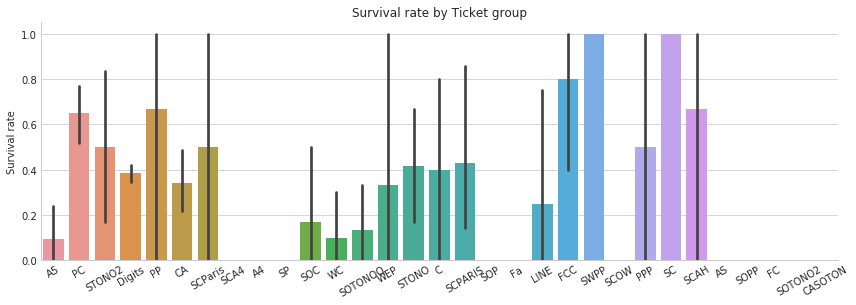

In [48]:
# Plot the survival rate per ticket group
train_df['ticket_groups'] = ticket_groups
g = sns.factorplot(data=train_df, x='ticket_groups', y='Survived', kind='bar', aspect=3)
g.ax.set_title('Survival rate by Ticket group')
g.set_ylabels('Survival rate')
g.set_xlabels('')
g.set_xticklabels(rotation=30)

The **Ticket** field, with some feature engineering, holds some valuable information that can be used to assist a prediction model to determine if passengers holding certain types of tickets would be more or less likely to survive. This type of data should be taken into account when modeling a predictor for this dataset.

### Cabin

In [49]:
# Count the number of unique cabins
train_df['Cabin'].value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
F33            3
D              3
F2             3
E101           3
C22 C26        3
D36            2
B49            2
C126           2
C123           2
D26            2
C93            2
C78            2
B28            2
B35            2
E8             2
C65            2
D33            2
B77            2
B18            2
B5             2
B51 B53 B55    2
E24            2
C92            2
B20            2
E44            2
F4             2
E25            2
              ..
B39            1
C91            1
E49            1
E10            1
A10            1
D48            1
B30            1
D6             1
A19            1
A6             1
C30            1
C54            1
B94            1
E38            1
D21            1
E46            1
E58            1
B79            1
B37            1
F G63          1
A5             1
C111           1
C45            1
F E69          1
D45            1
C49            1
C50            1
D56           

In [50]:
# Too many cabins to visualize, lets count the total unique cabins that exist
len(train_df['Cabin'].unique())

148

In [51]:
# See how many entries have missing values for the Cabin column
total_missing_values = train_df['Cabin'].isnull().sum()
total_data_rows = len(train_df['PassengerId'])
print('Number of non-empty cabin rows: {}'.format(total_data_rows - total_missing_values))
print('Total number of data rows in the train set: {}'.format(total_data_rows))

Number of non-empty cabin rows: 204
Total number of data rows in the train set: 891


There are alot of missing values for the **Cabin** field and 3/4 of those are unique values. However, it seems that the cabins are grouped by a letter prefix that we can take advantage off to see how many kinds of cabins there were. Lets retrieve the first letter of each cabin string and see how many groups we can get.

In [52]:
# Group each existing cabin by its first letter. Otherwise, set missing values as 'X'
cabin_letter = train_df['Cabin'].fillna('X').map(lambda cabin: cabin[0])
cabin_letter.value_counts()

X    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

Now, we have 9 unique types of cabin groups. Lets see what information we can gather using them.

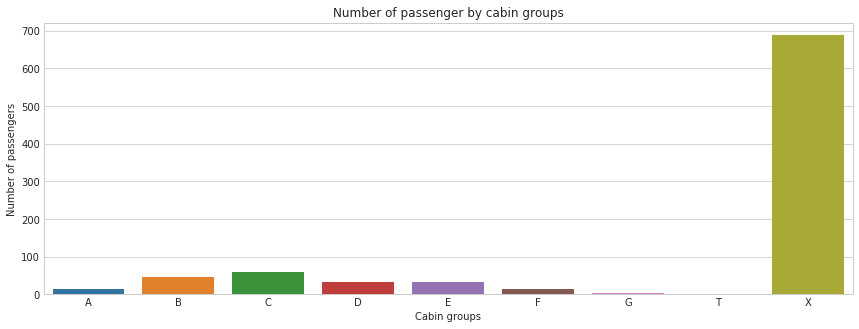

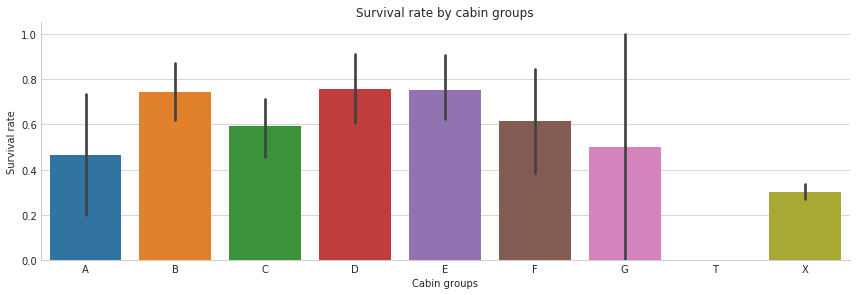

In [53]:
train_df['cabin_groups'] = cabin_letter

# Plot the number of passengers by cabin group
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14.5,5))
g = sns.countplot(data=train_df, x='cabin_groups', order=['A','B','C','D','E','F','G','T','X'], ax=ax)
ax.set_ylabel('Number of passengers')
ax.set_title('Number of passenger by cabin groups')
ax.set_xlabel('Cabin groups')

# Plot the survival rate of passengers by cabin group
g = sns.factorplot(data=train_df, x='cabin_groups', y='Survived', kind='bar', aspect=3, order=['A','B','C','D','E','F','G','T','X'])
g.set_ylabels('Survival rate')
g.set_xlabels('Cabin groups')
plt.title('Survival rate by cabin groups')

Passengers holding the **B**, **D**, and **E** had a higher survival rate comparing with the others, but with so few data points it is difficult give much importance to this information. However, some of these groups of cabins may provide good indicators for a prediction model to effectively use to help separate some subgroups of passengers.

## 3. Fill missing values and feature engineering

This section deals with cleaning data by filling missing values in the data set and engineer new features out of a combination of existing fields or by manipulating existing ones into more useful data (e.g., new categories).

### 3.1 Age

In [54]:
# Check how many missing values exists for the Age column
df['Age'].isnull().sum()

263

The **Age** column contains 256 missing values in the dataset.

To fill these missing values, we'll use the fields that have the most correlation with **Age**: **SibSp**, **Parch** and **Pclass**. We'll use the average ages of the passengers that have the same class, number of sibling/spouses and family size.

In [55]:
# Set a function to fill missing values for the Age column based on the passenger class, 
# number of siblings/spouses  and the number of parents/children
def fill_missing_ages(df):
    """
    Fills the missing ages with the median age of ages with the same Pclass, SibSp and Parch.
    Else, fills the missing age with the median of all ages.
    """
    ages_missing_index = df[df['Age'].isnull()].index
    for idx in ages_missing_index:
        row = df.loc[idx, :]
        median_age = df['Age'].median()
        media_age_pred = df[(df['Pclass'] == row['Pclass']) & (df['SibSp'] == row['SibSp']) & (df['Parch'] == row['Parch'])]['Age'].median()

        if np.isnan(media_age_pred):
            df.loc[idx, 'Age'] = median_age
        else:
            df.loc[idx, 'Age'] = media_age_pred

In [56]:
# Show the median ages before and after filling the missing values for Age
print('Median age before filling missing values: ', df['Age'].median())
fill_missing_ages(df)
print('Median age after filling missing values: ', df['Age'].median())

Median age before filling missing values:  28.0
Median age after filling missing values:  26.0


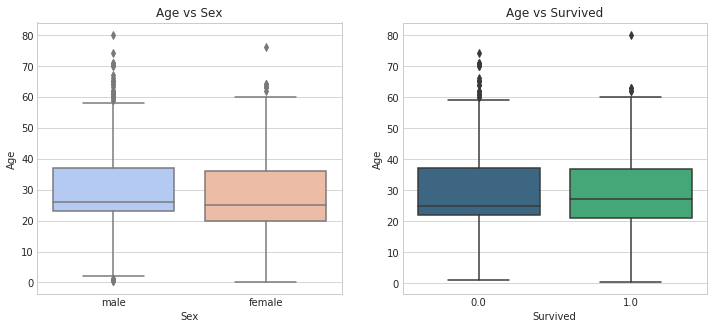

In [57]:
# Plot the distributions of passengers by age vs sex and age vs survived
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
g = sns.boxplot(data=df, y='Age', x='Sex', palette='coolwarm', ax=ax1)
ax1.set_title("Age vs Sex")
g = sns.boxplot(data=df, y='Age', x='Survived', palette='viridis',  ax=ax2)
ax2.set_title("Age vs Survived")

No big difference between median values of **Age** w.r.t. gender or survival rate.

### 3.2 Cabin

In [58]:
# Total number of missing values in Cabin
df['Cabin'].isnull().sum()

1014

**Cabin** is the field with the most missing values by far. Here we'll fill the missing values with a common value **X** and create categories with the inicial letter of the remaining cabins (for more information, see the data analysis and visualizations for the **Cabin** field in the previous section).

In [59]:
# Fill missing values of Cabin with 'X' and get the first letter of the remaining values
df['Cabin'] = df['Cabin'].fillna('X').map(lambda cabin: cabin[0])

In [60]:
# Total number of missing values after filing
df['Cabin'].isnull().sum()

0

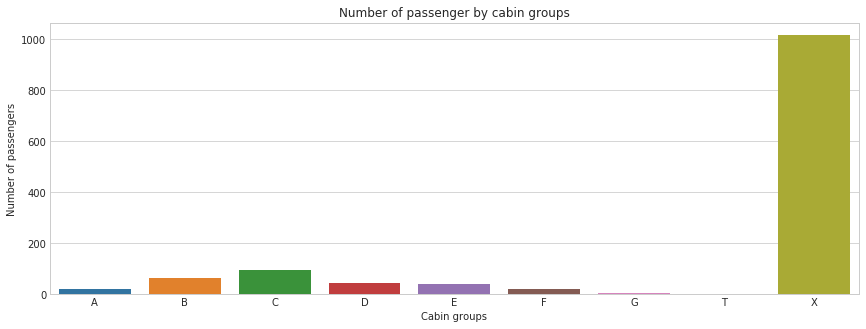

In [61]:
# Show a count plot of all values in Cabin
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14.5,5))
g = sns.countplot(data=df, x='Cabin', order=['A','B','C','D','E','F','G','T','X'], ax=ax)
ax.set_ylabel('Number of passengers')
ax.set_title('Number of passenger by cabin groups')
ax.set_xlabel('Cabin groups')

### 3.3 Embarked

In [62]:
# Total number of missing values in Embarked
df['Embarked'].isnull().sum()

2

Very few values are missing for the **Embarked** field. Lets fill these missing values with the port with the most people.

In [63]:
# Count how many passengers embarked per port
df['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [64]:
# Fill missing values with the most common port (S)
df['Embarked'] = df['Embarked'].fillna('S')

In [65]:
# Total number of missing values after filing
df['Embarked'].isnull().sum()

0

### 3.4 Fare

In [66]:
# Total number of missing values in Fare
df['Fare'].isnull().sum()

1

Only one missing value for **Fare**. We'll fill it the the median value.

In [67]:
# Fill the only missing value with the mean value
avg_fare = df['Fare'].median()
df['Fare'] = df['Fare'].fillna(avg_fare)

In [68]:
# Total number of missing values after filing
df['Fare'].isnull().sum()

0

If you recall, the **Fare** column had a skewed distribution to the left with a long tail to the right. We need to compact these values if we intend to feed them to a larning algoritm and expect them to be usefull for prediction.

Next, we'll use a logaritmic transformation (**log**) to compact the distribution into a smaller range of values.

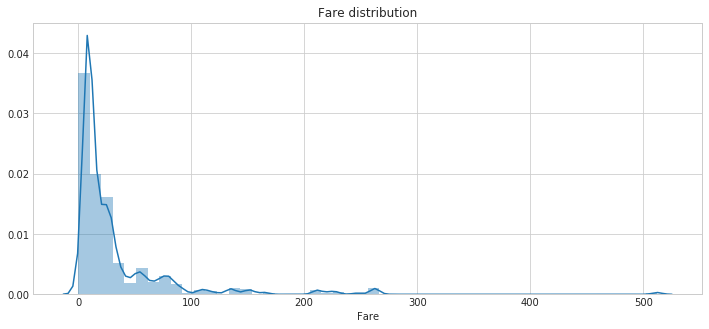

In [69]:
# Plot the Fare distribution
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,5))
g = sns.distplot(df['Fare'], ax=ax)
g.set_title('Fare distribution')

In [70]:
# Compress all values with a log function
df['Fare'] = df['Fare'].map(lambda fare: np.log(fare) if fare > 0 else 0)

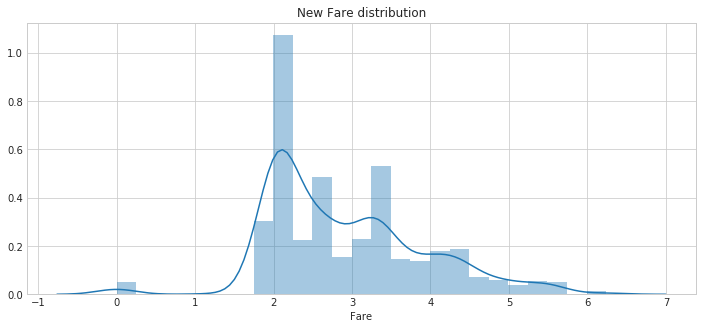

In [71]:
# Plot the new Fare distribution
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,5))
g = sns.distplot(df['Fare'], ax=ax)
g.set_title('New Fare distribution')

We see that the **Fare** distribution has now shrinked significantly. This will help learning models that will use this feature for predicting the survival of a passengers in a better, more meaningful way.

### (optional): show status on missing values of the dataset

In [72]:
# Count how many missing values persist in the dataset
df.isnull().sum()

Age              0
Cabin            0
Embarked         0
Fare             0
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
Ticket           0
dtype: int64

At this point, all fields are free of missing values (with the exception of the **Survived** that will be used as a label).

Now, it is time to proceed with engineering some features before creating a learning model using this data.

### 3.5 Ticket

This field contains several features that we've seen previously in the Section 2.6 where using the prefix of some tickets and grouping the remaining under a common class **digits** showed to create some very interesting categories that might come in usefull for a learning algorithm.

In [73]:
# Summary of the number of unique groups in Ticket
len(df['Ticket'].unique())

929

In [74]:
# Convert ticket strings to a category
df['Ticket'] = df['Ticket'].map(lambda ticket: 'digits' if ticket.isdigit() else ticket.replace('.', '').replace('/', '').strip().split(' ')[0])

In [75]:
# Summary of the number of unique groups in Ticket
len(df['Ticket'].unique())

37

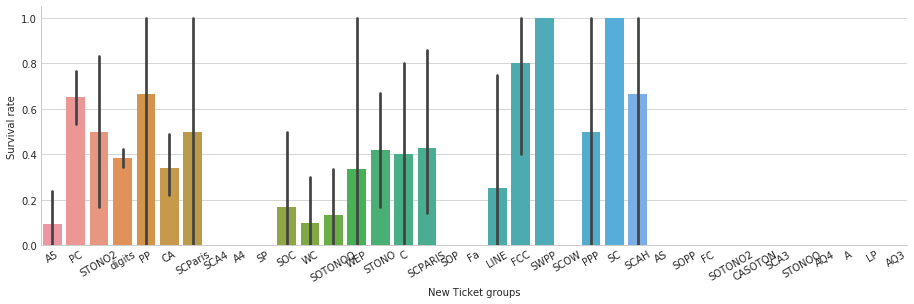

In [76]:
# Plot the survival rate for the new ticket groups
g = sns.factorplot(data=df, x='Ticket', y='Survived', kind='bar', aspect=3.2)
g.set_xticklabels(rotation=30)
g.ax.set_xlabel('New Ticket groups')
g.set_ylabels('Survival rate')

From the 929 different tickets we've grouped them into 37 distinct categories that we'll be using to feed into a learning algorithm in another notebook were we'll train several models to predict the survival rate of the Titanic passengers.

### New field: Name/Title

The **Title** of a passengers showed to help identifying classes of passengers that have better chances of survival than others (for more information see section 2.6 - Name).

Here, we'll fetch the titles from the **Name** column and group the most similar titles with each other to form 5 groups in total.

In [77]:
# Split the title from the name
titles = df['Name'].map(lambda name: name.split(',')[1].split('.')[0].strip())
titles.value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Major             2
Ms                2
Mlle              2
the Countess      1
Dona              1
Capt              1
Mme               1
Don               1
Sir               1
Jonkheer          1
Lady              1
Name: Name, dtype: int64

We'll be creating the following groups:

  - Mr
  - Miss (Miss/Mrs/Ms/Mlle/Mme)
  - Master
  - Captain (there's only one captain on the ship)
  - Rare (remaining)

In [78]:
# Convert titles into a smaller group
df['Title'] = titles
df['Title'] = df['Title'].replace(['Lady','the Countess','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'], 'Rare')
df["Title"] = df["Title"].map({"Master": 'Master', "Miss": 'Miss', "Ms" : 'Miss', "Mme": 'Miss', "Mlle": 'Miss', "Mrs": 'Miss', "Mr": 'Mr', "Capt": 'Captain', "Rare": 'Other'})

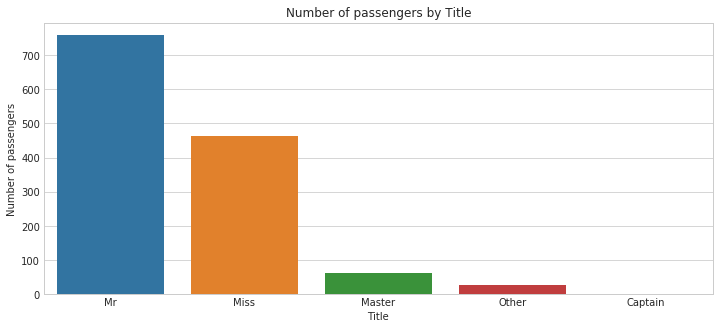

In [79]:
# Plot the number of passengers by title
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,5))
g = sns.countplot(data=df, x='Title', ax=ax)
g.set_ylabel('Number of passengers')
g.set_title('Number of passengers by Title')

### New field: Family size

The family size is given by the number of spouses/siblings and parents/children. As previously seen in section 2.6, the size of a person's family would be a good indicator of the survival rate of him/her. Therefore, lets create a new field that concerns with the size of a passengers family.

In [80]:
# Add the SibSp and Parch fields to get the size of the family
df['Family_size'] = df['SibSp'] + df['Parch'] + 1

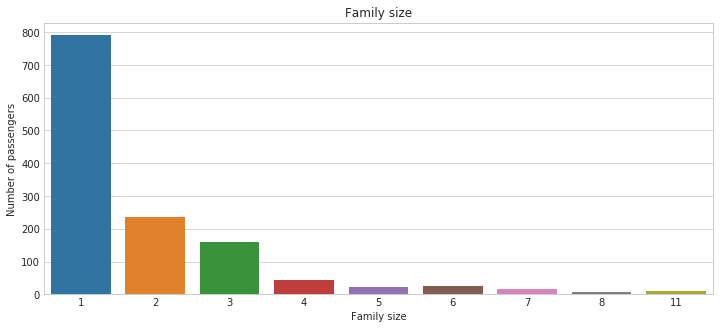

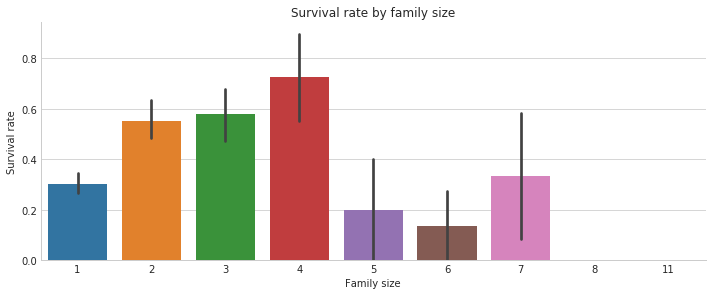

In [81]:
# plot the amount of passengers that have a certain family size
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,5))
g = sns.countplot(data=df, x='Family_size', ax=ax)
g.set_title('Family size')
g.set_ylabel('Number of passengers')
g.set_xlabel('Family size')

# plot the survival rate by family size
g = sns.factorplot(data=df, x='Family_size', kind='bar', y='Survived', aspect=2.5)
g.ax.set_title('Survival rate by family size')
g.set_ylabels('Survival rate')
g.ax.set_xlabel('Family size')

There seems to be quite a number of different sizes of families that went on this trip. Single people (family size of 1) have a lower survival rate compared to other passengers with bigger family sizes. Here we can note there are 4 different trends in the data:

  - **Single passengers** (size 1)
  - **Small families** (size 2-3)
  - **Medium families** (size 4)
  - **Big families** (size 5-11)

Lets group passengers by family size with these splits.

In [82]:
# Set the function to categorize a family by its size
def family_group(family_size):
    """
    Returns a family group to a family size.
    """
    if family_size == 1:
        return 'Single'
    elif family_size == 2 or family_size == 3:
        return 'Small'
    elif family_size == 4:
        return 'Medium'
    else:
        return 'Large'

In [83]:
family_group = df['Family_size'].map(family_group)
df['Family_group'] = family_group

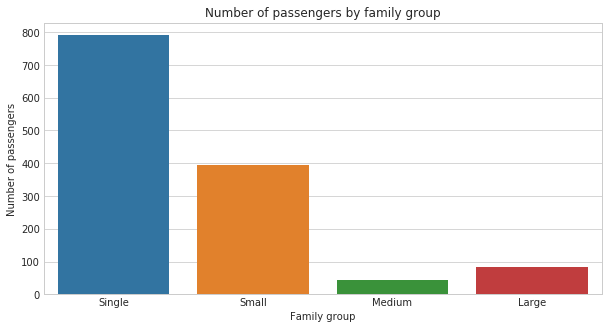

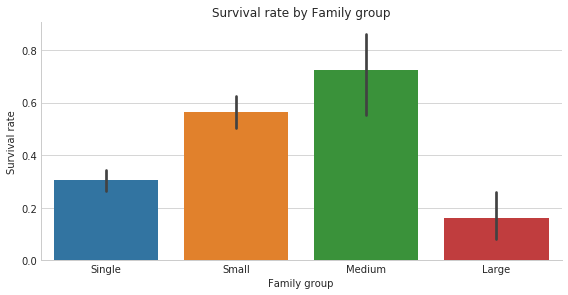

In [84]:
# Plot the number of passenegrs by family group
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
g = sns.countplot(data=df, x='Family_group', order=['Single', 'Small', 'Medium', 'Large'], ax=ax)
g.set_title('Number of passengers by family group')
g.set_ylabel('Number of passengers')
g.set_xlabel('Family group')

# Plot the survival rate by family group
g = sns.factorplot(data=df, x='Family_group', y='Survived', kind='bar', order=['Single', 'Small', 'Medium', 'Large'], aspect=2)
g.ax.set_title('Survival rate by Family group')
g.set_ylabels('Survival rate')
g.ax.set_xlabel('Family group')

**Small** and **Medium** families seem to have the highest survival rates. **Big** families have a lower chance of survival than **Single** passengers which seems to be expected since the chance of someone form a bigger family having all family members surviving will be lower than smaller families with less members.

## 4. Export data

This section deals with preparing the processed data for consumption by a statistical learning algorithm. Here, categorical values will be converted to numerical ones, and unnecessary fields will be discarded.

### 4.1. Convert fields to categorical values

It is important to convert a categorical field (i.e., string values) to numerical in order for statistical learning  to be able to use them for prediction. This can be done using **pd.get_dummies()**.

In [85]:
# Convert Ticket to categorical values
df = pd.get_dummies(df, columns = ["Ticket"], prefix="Ticket")

In [86]:
# Convert Family Group to categorical values
df = pd.get_dummies(df, columns = ["Family_group"], prefix="Fsize")

In [87]:
# Convert Title to categorical values
df = pd.get_dummies(df, columns = ["Title"], prefix="Title")

In [88]:
# Convert Cabin to categorical values
df = pd.get_dummies(df, columns = ["Cabin"], prefix="Cabin")

In [89]:
# Convert Embarked to categorical values
df = pd.get_dummies(df, columns = ["Embarked"], prefix="E")

In [90]:
# Convert Sex to categorical values
df = pd.get_dummies(df, columns = ["Sex"], prefix="Sex")

In [91]:
# Convert Pclass to categorical values
df = pd.get_dummies(df, columns = ["Pclass"], prefix="Pclass")

In [92]:
# Check all the new columns created
df.columns

Index(['Age', 'Fare', 'Name', 'Parch', 'PassengerId', 'SibSp', 'Survived',
       'Family_size', 'Ticket_A', 'Ticket_A4', 'Ticket_A5', 'Ticket_AQ3',
       'Ticket_AQ4', 'Ticket_AS', 'Ticket_C', 'Ticket_CA', 'Ticket_CASOTON',
       'Ticket_FC', 'Ticket_FCC', 'Ticket_Fa', 'Ticket_LINE', 'Ticket_LP',
       'Ticket_PC', 'Ticket_PP', 'Ticket_PPP', 'Ticket_SC', 'Ticket_SCA3',
       'Ticket_SCA4', 'Ticket_SCAH', 'Ticket_SCOW', 'Ticket_SCPARIS',
       'Ticket_SCParis', 'Ticket_SOC', 'Ticket_SOP', 'Ticket_SOPP',
       'Ticket_SOTONO2', 'Ticket_SOTONOQ', 'Ticket_SP', 'Ticket_STONO',
       'Ticket_STONO2', 'Ticket_STONOQ', 'Ticket_SWPP', 'Ticket_WC',
       'Ticket_WEP', 'Ticket_digits', 'Fsize_Large', 'Fsize_Medium',
       'Fsize_Single', 'Fsize_Small', 'Title_Captain', 'Title_Master',
       'Title_Miss', 'Title_Mr', 'Title_Other', 'Cabin_A', 'Cabin_B',
       'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T',
       'Cabin_X', 'E_C', 'E_Q', 'E_S', 'Sex_female', 'Sex_male

### 4.2. Split data to train and test sets


In [93]:
# Retrieve the train data group
train_data = df.loc['train']

In [94]:
# Retrieve the test data group
test_data = df.loc['test']

### 4.3. Save transformed data to .csv files

In [95]:
train_data.to_csv("data/train_processed.csv")

In [96]:
test_data.to_csv("data/test_processed.csv")